In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("E:\\pythonEverything\\My Uber Drives - 2016.csv")

In [3]:
df.columns=df.columns.str.replace('*',"")   # str is string


In [4]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:05,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1156 non-null   object 
 2   CATEGORY    1156 non-null   object 
 3   START       1156 non-null   object 
 4   STOP        1156 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     904 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [21]:
df.groupby(['START','STOP'])['MILES'].mean().reset_index().sort_values('MILES',ascending=False)

,START,STOP,MILES
173,Latta,Jacksonville,310.3
143,Jacksonville,Kissimmee,201.0
11,Asheville,Mebane,195.9
363,lahore,Karachi,195.6
204,Morrisville,Banner Elk,195.3
...,...,...,...
297,Sunnyside,Ingleside,0.7
184,Medical Centre,Tudor City,0.7
56,Central,West Berkeley,0.6
281,Soho,Tribeca,0.5


In [8]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           1
PURPOSE       252
dtype: int64

In [9]:
# any row that has all of the mentioned columns as null we drop it
#df.dropna(how='all',subset=['END_DATE','CATEGORY','START','STOP','PURPOSE'],inplace=True)

In [10]:
(df['PURPOSE'].isnull().sum()/(df.shape[0]))*100

21.79930795847751

In [11]:
df['CATEGORY'].value_counts()  # tells about differet types of values available in our column

CATEGORY
Business    1079
Personal      77
Name: count, dtype: int64

In [12]:
df['PURPOSE'].fillna(method='ffill',inplace=True)
df.MILES.fillna(method='ffill',inplace=True)

In [13]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [14]:
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


errors='coerce'  this mean that if there is any problem while we are converting the data do not stop the data conversion in between just put null wherever there is an error

In [15]:
df.START_DATE=pd.to_datetime(df['START_DATE'],errors='coerce')
df.END_DATE=pd.to_datetime(df['END_DATE'],errors='coerce')

In [16]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:05:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


<Axes: ylabel='count'>

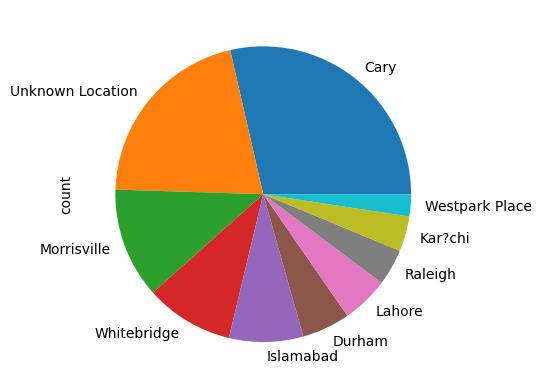

In [29]:
start_point=df.START.value_counts()
start_point.head(10).plot(kind='pie')

In [30]:
start_point.tail(5)

START
Hell's Kitchen           1
Briar Meadow             1
Lakeview                 1
Lower Garden District    1
Gulfton                  1
Name: count, dtype: int64

In [34]:
stop_points=df.STOP.value_counts()
stop_points.head(10)

STOP
Cary                203
Unknown Location    148
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64

<Axes: ylabel='count'>

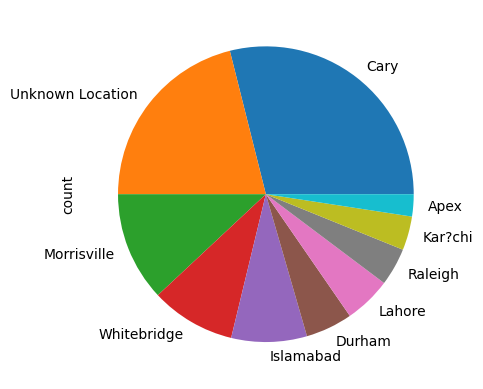

In [36]:
stop_points.head(10).plot(kind='pie')

<Axes: ylabel='count'>

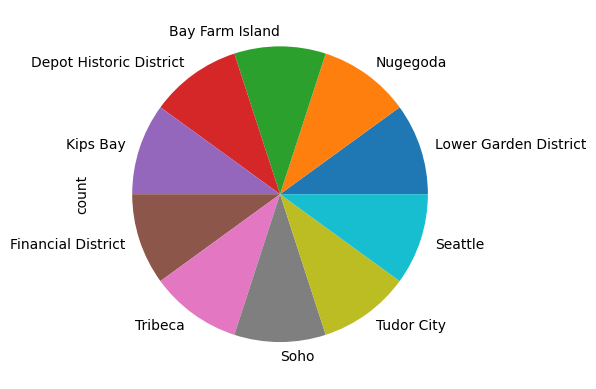

In [37]:
stop_points.tail(10).plot(kind='pie')

<Axes: xlabel='MILES'>

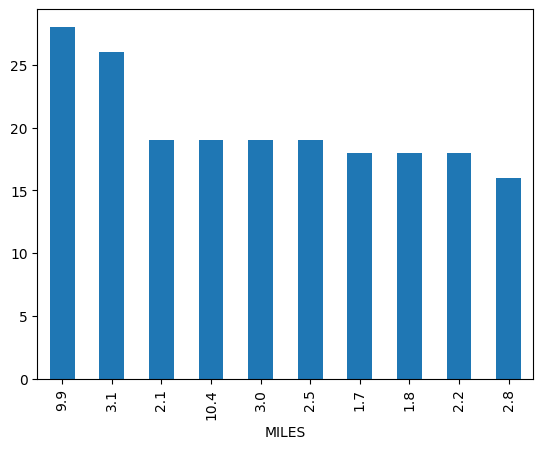

In [41]:
df.MILES.value_counts().head(10).plot(kind='bar')

<Axes: xlabel='count', ylabel='PURPOSE'>

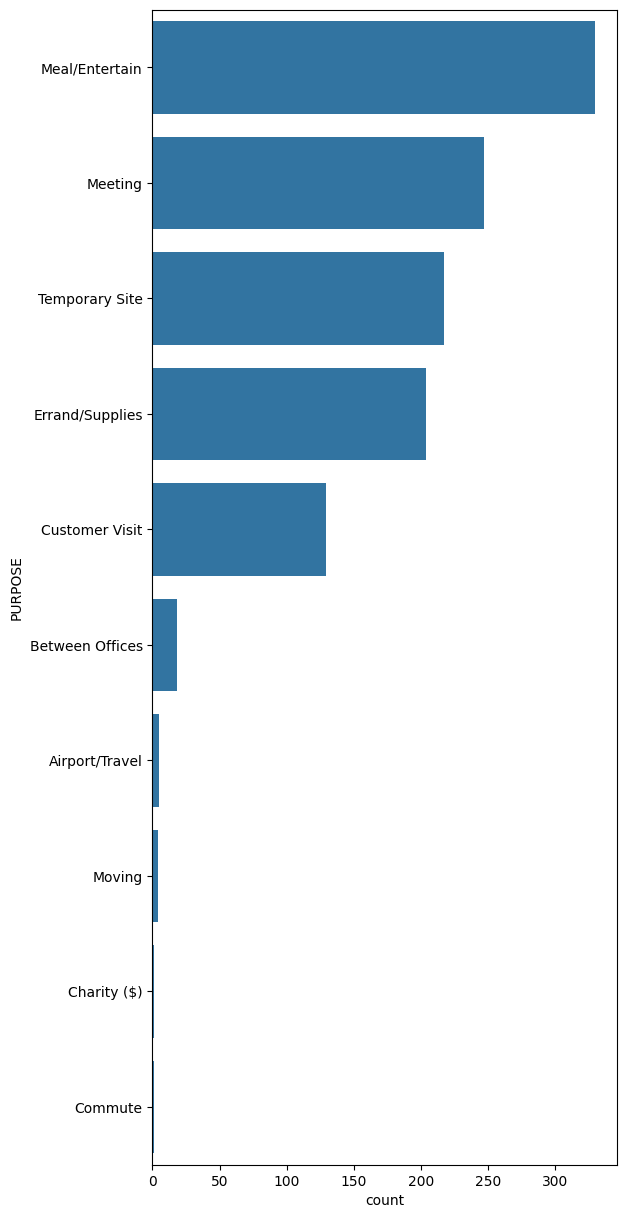

In [43]:
plt.figure(figsize=(6,15))
sns.countplot(df.PURPOSE,order=df['PURPOSE'].value_counts().index)

In [58]:
df.groupby(['START','STOP']).value_counts()

START          STOP                START_DATE           END_DATE             CATEGORY  MILES  PURPOSE          MINUTES
Agnew          Agnew               2016-11-05 19:20:00  2016-11-05 19:28:00  Business  2.2    Meal/Entertain   8.0        1
               Cory                2016-11-04 21:04:00  2016-11-04 21:20:00  Business  4.3    Errand/Supplies  16.0       1
               Renaissance         2016-11-06 10:50:00  2016-11-06 11:04:00  Business  2.4    Meal/Entertain   14.0       1
                                   2016-11-05 08:34:00  2016-11-05 08:43:00  Business  2.2    Meal/Entertain   9.0        1
Almond         Bryson City         2016-10-30 12:58:00  2016-10-30 13:18:00  Business  15.2   Meal/Entertain   20.0       1
                                                                                                                         ..
Whitebridge    Whitebridge         2016-03-22 19:12:00  2016-03-22 19:25:00  Personal  1.4    Meal/Entertain   13.0       1
             

In [59]:
df.groupby(['START','STOP'])['MILES'].max()

START          STOP              
Agnew          Agnew                   2.2
               Cory                    4.3
               Renaissance             2.4
Almond         Bryson City            15.2
Apex           Apex                    3.3
                                     ...  
Whitebridge    Westpark Place          6.3
               Whitebridge             4.2
               Williamsburg Manor      8.3
Winston Salem  Asheville             133.6
lahore         Karachi               195.6
Name: MILES, Length: 364, dtype: float64

In [68]:
df['MINUTES']=df.END_DATE-df.START_DATE
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,0 days 00:04:00
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,0 days 00:05:00
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,0 days 00:06:00
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,0 days 00:20:00
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,0 days 00:27:00


In [67]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [71]:
df.MINUTES=df.MINUTES.dt.total_seconds()/60
df

AttributeError: Can only use .dt accessor with datetimelike values

In [79]:
def rounds(x):
    if x['START']==x['STOP']:
        return 1
    else:
        return 0

In [81]:
df['ROUNDTRIP']=df.apply(rounds,axis=1)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUNDTRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,0
...,...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,1
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,0
1154,2016-12-31 22:08:00,2016-12-31 23:05:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,57.0,0
